 Applied Statistics for Decision Support in Data Science

Objective: Understand the application of Linear regression in real world scenarios and implement the classification techniques taught as part of the module DSC 7402, to solve the near real time use case from telecommunications domain.
Brief Learning Outcomes: 
• Be able to understand and explore Data 
• Be able to prepare and pre-process the data for modelling 
• Be able to implement basic regression model(s), analyze it and interpret the output 
• Be able to choose an evaluation metric for the problem at hand 
• Be able to improve the improve model performance by removing multi-collinearity 
• Using significant variables 
• Imposing regularization techniques 
• Be able to choose the final best models of all the models.

Project - Domain: Retail
Background: The customer from the gaming industry keen on understanding the customers better. 
As part of the exercise, he would like to know revenue potential from each of the customers. 

Problem statement: Give the customer information, predict the revenue potential.

Tasks- Perform the following activities:
1. Reading & Data Pre-processing
a. Read the data 
b. Explore and understand the data 
c. Check and handle missing values if any 
d. Perform type-conversion for required columns
2. Split the data into train and validation sets 
3. Model Building 
Model1 - Basic: 
Build Basic model on all attributes, analyze model performance 
Interpret the model output
Significance of overall model 
Interpret coefficients for any of the numerical and categorical attributes 
Choose the appropriate evaluation metric.
4. Steps to improve Model performance –
(a) Build additional models:
Model 2- Check for multicollinearity using VIF, and build the model after removing multi-collinear attributes; analyze model performance.
Model 3- Model with significant attributes given by Model2; analyze model performance
Model 4- For the Model 2, compute performance with probability threshold decided based on ROC curve; analyze model performance
Model 5- Model 2 with regularization imposed; analyze model performance
Create a table with model coefficients from each of the models. Write your observations
Build Lasso, Ridge and Elastic Net models and compare the model performance
(b) Tabulate the train and validation results for all the above models
(c) Analyze model performances and finalize the model
4


## Loading the required modules 
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn

In [ ]:
# Mounting google drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
;

**Check the head of customers, and check out its info() and describe() methods.**

In [ ]:
gaming.shape # records and columns

(3209, 14)

In [ ]:
gaming.head() # snapshot of the data

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
gaming.describe() # summary to understand the data, prints the summary only for numeric attributes by default

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,191.250000
max,4209.000000,2.000000,11.000000,113.000000,113.000000,472.000000,119.000000,112.000000,27829.000000,1166.000000,115.000000,990.560000


In [ ]:
gaming.info() # To understand the data type for each of the variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    3209 non-null   int64  
 1   City                          3209 non-null   int64  
 2   NoOfChildren                  3209 non-null   int64  
 3   MinAgeOfChild                 3209 non-null   int64  
 4   MaxAgeOfChild                 3209 non-null   int64  
 5   Tenure                        3209 non-null   int64  
 6   FrquncyOfPurchase             3209 non-null   int64  
 7   NoOfUnitsPurchased            3209 non-null   int64  
 8   FrequencyOFPlay               3209 non-null   int64  
 9   NoOfGamesPlayed               3209 non-null   int64  
 10  NoOfGamesBought               3209 non-null   int64  
 11  FavoriteChannelOfTransaction  3209 non-null   object 
 12  FavoriteGame                  3209 non-null   object 
 13  Tot

In [ ]:
gaming.dtypes

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

In [ ]:
for col in ['City','FavoriteChannelOfTransaction','FavoriteGame']:
    gaming[col] = gaming[col].astype('category')
gaming.dtypes

CustomerID                         int64
City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use Plotly to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [ ]:
#!pip install plotly

In [ ]:
import plotly.express as px #importing plotly

In [ ]:
fig = px.scatter(gaming, x="FrequencyOFPlay", y="TotalRevenueGenerated",)
fig.show() 

In [ ]:
  fig = px.scatter(gaming, x="NoOfGamesBought", y="TotalRevenueGenerated",)
  fig.show() #plotting scatter plot with "Time on Website","Yearly Amount Spent"

# Data Preparation for model building 

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [ ]:
gaming_clean = gaming
gaming_clean.head() #snapshot of clean data

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
gaming_clean.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   CustomerID                    3209 non-null   int64   
 1   City                          3209 non-null   category
 2   NoOfChildren                  3209 non-null   int64   
 3   MinAgeOfChild                 3209 non-null   int64   
 4   MaxAgeOfChild                 3209 non-null   int64   
 5   Tenure                        3209 non-null   int64   
 6   FrquncyOfPurchase             3209 non-null   int64   
 7   NoOfUnitsPurchased            3209 non-null   int64   
 8   FrequencyOFPlay               3209 non-null   int64   
 9   NoOfGamesPlayed               3209 non-null   int64   
 10  NoOfGamesBought               3209 non-null   int64   
 11  FavoriteChannelOfTransaction  3209 non-null   category
 12  FavoriteGame                  3209 non-null   ca

In [ ]:
X = gaming_clean.drop(['CustomerID','TotalRevenueGenerated'],axis=1) #independent attributes

In [ ]:
X

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform
...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1,2,4,6,365,16,16,827,78,16,Favorite,Uniform
3205,1,2,2,5,348,20,20,2933,294,13,Favorite,Uniform
3206,1,2,5,7,341,16,13,1250,126,16,Uniform,Uniform
3207,1,2,6,7,368,18,14,1364,122,18,Favorite,Uniform


In [ ]:
y = gaming_clean['TotalRevenueGenerated'] #dependent attributes

In [ ]:
import statsmodels.api as sm # import stats model o/p : R model
from sklearn.model_selection import train_test_split # importing neccessary modules

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

## Spilit the data into Training and Testing Data

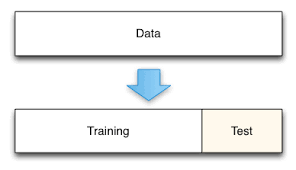

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) #train test split


In [ ]:
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')

In [ ]:
#print(len(y_train))
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 2567
X Train Size: 2567
X Test  Size: 642
Y Target Size: 642


In [ ]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

,const,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
924,1.0,1,4,4,420,16,11,779,44,13,0,1,1
2731,1.0,3,8,12,227,19,19,1794,130,19,0,0,1
1125,1.0,1,6,6,464,8,8,5128,149,5,0,0,1
2701,1.0,1,7,7,189,10,10,191,33,10,0,0,1
1023,1.0,2,7,8,389,15,15,774,91,15,0,0,1


In [ ]:
y_train[:5] #snapshot of Y train

1213    479.69
1529    132.50
550     229.97
172     125.38
624     110.00
Name: TotalRevenueGenerated, dtype: float64

In [ ]:
X_train.columns

Index(['const', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

# Errors metrics to evaluate the model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#defining MAPE

In [ ]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act,test_pred)
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

In [ ]:
def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    DF=pd.concat([coefficients,tempdf],axis=1)
    return(DF) 

In [ ]:
from scipy import stats

In [ ]:
#definition of residual plots function
from scipy import stats
def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm
    
    
    fig, ax = plt.subplots(2,2,figsize=(14,10))
    
    ########## Residuals vs fitted - linearity of Errors ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    
    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()
    
    
    ######### qq plot - Normality of Errors ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = 'none')
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()
    
    
    ######### Homoscedasticity - Errors Constant Variance ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values')
    ax[1,0].set_title('Scale-Location')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()
    
    
    ######### Cooks distance  - Influential Points ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = 'none')
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

In [ ]:
# f = plt.figure(figsize=(14,5))
# ax = f.add_subplot(221)
# sns.scatterplot(y_train,results.fittedvalues,ax=ax,color='r')
# ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# std_residuals = stats.zscore(y_train-results.fittedvalues)
# f = plt.figure(figsize=(14,5))
# ax = f.add_subplot(222)
# sns.scatterplot(results.fittedvalues,std_residuals,ax=ax,color='g')
# ax.set_title('Check for Linearity:\n Predicted value Vs Std.Residuals')



# # Check for Residual normality & mean
# ax = f.add_subplot(223)
# sns.distplot((y_train - results.fittedvalues),ax=ax,color='b')
# ax.axvline((y_train - results.fittedvalues).mean(),color='k',linestyle='--')
# ax.set_title('Check for Residual normality & mean: \n Residual eror');


## MODEL 1 : Basic model with all columns

Now its time to train our model on our training data!



In [ ]:
model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.663
Model:                               OLS   Adj. R-squared:                  0.662
Method:                    Least Squares   F-statistic:                     1008.
Date:                   Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                           08:47:45   Log-Likelihood:                -13544.
No. Observations:                   2567   AIC:                         2.710e+04
Df Residuals:                       2561   BIC:                         2.714e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
#Get error metrics
scores = get_metrics(y_train,model1.predict(X_train),
                     y_test,model1.predict(X_test),
                     "Model 1",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Model1,32.299911,1.964576e+03,44.323535,19.604356,32.917903,1.953135e+03,44.194284,19.219772,0.704549
1,Model 2,14765.886690,4.951312e+08,22251.543692,9439.974303,15570.566528,6.223095e+08,24946.131907,9429.953449,-74461.413674
2,Model 3,33.954689,2.239532e+03,47.323689,20.443082,34.168489,2.268379e+03,47.627505,19.808644,0.663199
3,Model 2,33.964218,2.239004e+03,47.318118,20.450464,34.165057,2.264922e+03,47.591202,19.804521,0.663278
4,Model 1,31.154734,1.885396e+03,43.421143,18.847859,31.829621,1.861658e+03,43.146936,18.609482,0.716457
5,Model1,32.299911,1.964576e+03,44.323535,19.604356,32.917903,1.953135e+03,44.194284,19.219772,0.704549
6,Model 3,34.004957,2.240940e+03,47.338566,20.496144,34.329822,2.288031e+03,47.833365,19.884637,0.662987
7,Model 1,34.004957,2.240940e+03,47.338566,20.496144,34.329822,2.288031e+03,47.833365,19.884637,0.662987


In [ ]:
coefficients=pd.DataFrame(model1.params)
coefficients.rename(columns = {0 :"M1: Model with all Columns"},inplace = True)
coefficients

,M1: Model with all Columns
const,47.698915
NoOfChildren,1.912619
NoOfUnitsPurchased,14.750251
NoOfGamesPlayed,-0.022814
NoOfGamesBought,-5.751145
FavoriteGame_Uniform,-14.203559


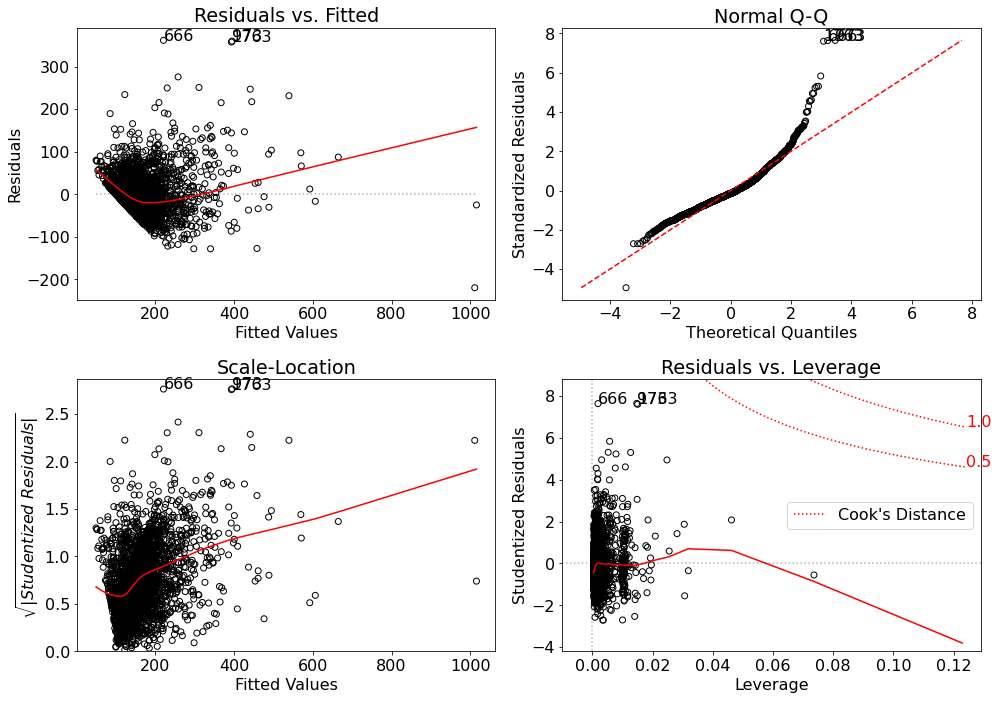

In [ ]:
residual_plots(model1) #get residual plots of model

## Influential points

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
influence_points = OLSInfluence(model3) # results is output from the lm model built earlier

pd.DataFrame(influence_points.influence).describe()

,0
count,2567.000000
mean,0.008926
std,0.683638
min,-30.712583
25%,-0.032614
50%,-0.007180
75%,0.026831
max,5.881057


In [ ]:
pd.DataFrame(influence_points.influence)

,0
1213,0.206401
1529,-0.122962
550,-0.031009
172,-0.014783
624,-0.019235
...,...
48,-0.010970
772,0.115971
1848,0.010976
1231,-0.015847


In [ ]:
# removal of influence points using influence value
influence_data = pd.DataFrame(influence_points.influence[influence_points.influence>=1])
gaming_clean['influence_value']= influence_points.influence
gaming_clean.loc[influence_data.index,].sort_values(['influence_value'], ascending = False).head(10)


,CustomerID,NoOfChildren,MinAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform,influence_value
1488,2489,8,5,403,40,45,2916,276,29,770.95,0,0,1,5.881057
1763,2764,3,5,433,37,37,6743,586,31,750.96,0,0,1,5.458125
973,1974,5,5,381,22,27,122,7,8,754.81,0,0,1,5.383263
462,1463,7,1,428,42,38,9538,986,42,439.57,1,0,1,4.662356
1801,2802,3,4,294,4,12,43,6,0,479.97,0,0,0,3.215122
1807,2808,3,4,457,85,76,2515,289,85,752.25,0,0,1,2.752613
2369,3370,1,4,424,53,45,550,47,44,662.48,0,0,1,2.409992
412,1413,7,6,412,54,45,9357,290,54,537.53,0,1,1,2.173047
2751,3752,2,3,388,47,44,1287,153,42,688.23,0,1,1,1.955480
1316,2317,4,5,367,84,69,3605,216,84,637.50,0,0,1,1.927364


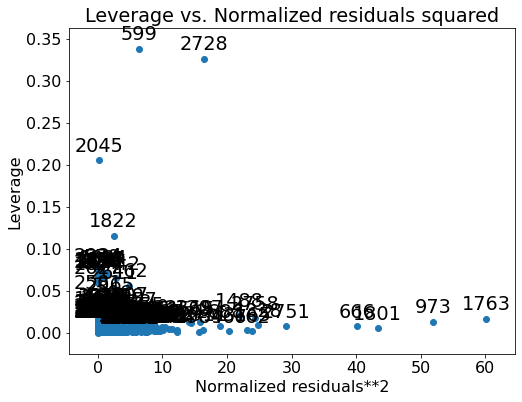

In [ ]:
# leverage vs residual plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)

In [ ]:
gaming_clean.loc[[599,2728,1763,973,2934]] #looking at Influential points

,CustomerID,NoOfChildren,MinAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform,influence_value
2934,3935,2,4,413,119,112,4202,543,115,990.56,0,0,1,-1.987967


In [ ]:
gaming_clean=gaming_clean.drop([2934])
#removal of influential points based on above plot

In [ ]:
fig_without_outliers = px.scatter(gaming_clean, x="NoOfUnitsPurchased", y="TotalRevenueGenerated",trendline="ols")
fig_without_outliers.show() #plot sactter plot between "Length of Membership","Yearly Amount Spent"

#### Plotting linear model plot (using plotly's scatter) of Yearly Amount Spent vs. Length of Membership before and after removal of outliers

In [ ]:
X = customers_clean.drop(['Yearly Amount Spent'],axis=1)
y = customers_clean['Yearly Amount Spent']  #seperate X and Y

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
# ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [ ]:
## Spilit the data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
len(y_train)
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))  #length of each split

In [ ]:
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')  #dummification

In [ ]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

In [ ]:
X_train.columns  #get columns of X train

In [ ]:
multiple_reg2 = sm.OLS(y_train, X_train[['const','Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Gender_Male']]).fit()

print(multiple_reg2.summary())  #build a regression model

In [ ]:
#get error metrics
scores = get_metrics(y_train,multiple_reg2.predict(X_train[['const','Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Gender_Male']]),y_test,multiple_reg2.predict(X_test[['const','Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Gender_Male']]),"MLR_without_outliers",scores)
scores

In [ ]:
#get coefficients
coefficients=coeff("MLR_without_outliers",multiple_reg2.params)
coefficients

In [ ]:
from scipy import stats


## Model 2

In [ ]:
gaming_clean.head() #get snapshot of clean data

,CustomerID,NoOfChildren,MinAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform,influence_value
0,1001,2,3,210,11,11,2344,108,10,107.51,0,1,1,-0.019759
1,1002,2,3,442,20,20,245,22,7,382.40,0,0,1,0.460690
2,1003,4,3,424,18,18,1059,130,18,135.01,0,0,1,-0.110136
3,1004,1,6,261,11,9,365,34,11,125.00,0,0,1,0.024481
4,1005,3,6,422,44,31,1066,102,44,335.05,0,1,1,0.584864


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #import VIF


In [ ]:
# gaming_clean=gaming_clean.drop(['MaxAgeOfChild'],axis=1) #drop influence value

In [ ]:
gaming_clean=pd.get_dummies(gaming_clean,drop_first=True,dtype='int8') #dummification

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = gaming_clean.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(gaming_clean.values, i)
                          for i in range(len(gaming_clean.columns))]
  
print(vif_data) #print VIF data

MissingDataError: ignored

In [ ]:
vif_data.sort_values(by='VIF',ascending=False) #sort VIF data

In [ ]:
sns.heatmap(gaming_clean.corr(),annot=True,cmap='Purples') #plot correlation plot

In [ ]:
gamingVIF= gaming_clean.drop(columns = ['FrquncyOfPurchase'],axis=1)


In [ ]:
sns.heatmap(gamingVIF.corr(),annot=True,cmap='Purples') #plot correlation plot

In [ ]:
X = gamingVIF.drop(['CustomerID','TotalRevenueGenerated'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)
model2 = sm.OLS(y_train, X_train).fit()
print(model2.summary())

In [ ]:
#get coefficients 
coefficients=coeff("M2 : Multicollinearity Removed(VIF)",model2.params)
coefficients

In [ ]:
#Get error metrics
scores = get_metrics(y_train,model2.predict(X_train),
                     y_test,model2.predict(X_test),
                     "Model 2",scores)
scores

In [ ]:
residual_plots(model2) #get residual plots of model

## Model 3 
### Dropping insignificant variables acc to Model 2 ..

In [ ]:
X = gamingVIF.drop(['CustomerID','TotalRevenueGenerated','City_2','FrequencyOFPlay', 'MinAgeOfChild','Tenure','City_2', 'FavoriteChannelOfTransaction_Uniform'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)
model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

In [ ]:
#get coefficients 
coefficients=coeff("M3 : Removing Non significant variables",model3.params)
coefficients

In [ ]:
#Get error metrics
scores = get_metrics(y_train,model3.predict(X_train),
                     y_test,model3.predict(X_test),
                     "Model 3",scores)
scores

In [ ]:
residual_plots(model3) #get residual plots of model

## Model 4
### For the Model 2, compute performance with probability threshold decided based on ROC curve; analyze model performance

In [ ]:
X = gaming_clean.drop(['CustomerID','TotalRevenueGenerated','City_2','FrequencyOFPlay'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)
model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
y_pred = model2.predict(X_test).tolist()
y_act = y_test.tolist()
# print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y_act, y_pred)
print(y_pred)
print(y)

In [ ]:
X_train.columns  #columns of X train

In [ ]:
model3 = sm.OLS(y_train, X_train[['NoOfChildren', 'MinAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought']]).fit()
print(model3.summary()) #build a model using few of the attribute

In [ ]:
#get error metrics
scores = get_metrics(y_train,model3.predict(X_train[['NoOfChildren', 'MinAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought']]),y_test,model3.predict(X_test[['NoOfChildren', 'MinAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought']]),"Multiple_Linear_Regression",scores)
scores

In [ ]:
#get coefficients 
coefficients=coeff("Multiple_Optimized_Linear_Regression",model3.params)
coefficients

In [ ]:
# Building the Model with Categorical variables. You will get an error . 
# Think why get the ValueError is and We will fix this error soon!
# multiple_reg = sm.OLS(y_train, X_train_reg[['const', 'Gender', 'Time on App', 'Time on Website']]).fit() 
# print(multiple_reg.summary())

# Multiple Regression model with Categorical Variables - Dummification

In [ ]:
# Dummification 
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')

In [ ]:
X_train.head() #snapshot of X train

In [ ]:
print(X_train.columns)
print("\n")
print(X_test.columns)
print("\n")
print("\n No. of columns in Train Data :{}".format(len(X_train.columns)))
print("\n No. of columns in Test Data :{}".format(len(X_test.columns))) 

In [ ]:
model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary()) #build a model using all attributes

In [ ]:
def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    DF=pd.concat([coefficients,tempdf],axis=1)
    return(DF) 

In [ ]:
#get Coefficients
coefficients=pd.DataFrame(model.params)
coefficients=coeff("MLR_with_all_attributes",model1.params)
coefficients

In [ ]:
# get error metrics
scores = get_metrics(y_train,multiple_reg1.predict(X_train),y_test,multiple_reg1.predict(X_test),"MLR_with_all_attributes",scores)
scores

# Residuals - QQ Plot

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [ ]:
residual_plots(multiple_reg) #get residual plots of model

## Standardizing the data 



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler() #importing Scaler

In [ ]:
num_vars = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'] #defining Numerical variable 

In [ ]:
X = customers_clean.drop(['Yearly Amount Spent','influence_value'],axis=1)
y = customers_clean['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #train test split

In [ ]:
X_train.head() #snapshot of X train

In [ ]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

print(X_train.head()) 
#Scaling

In [ ]:
# adding the Constant term
X_train = sm.add_constant(X_train)
print(X_train.head())

X_test = sm.add_constant(X_test)
#X_test.head()

In [ ]:
y_train[:10] #snapshot of Y train

In [ ]:
X_train[:10] #snapshot of X train

In [ ]:
X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8') #dummification

## Build a Multiple Linear regression after standardizing Data i.e., Dummification & Standard Scaler

In [ ]:
multiple_reg3= sm.OLS(y_train, X_train).fit()
print(multiple_reg3.summary()) #build a regression model

In [ ]:
residual_plots(multiple_reg3) #Get residual plots

In [ ]:
#get error metrics
scores = get_metrics(y_train,multiple_reg3.predict( X_train),y_test,multiple_reg3.predict(X_test),"MLR_after_standardization",scores)
scores

In [ ]:
#get coefficients
coefficients=coeff("MLR_after_standardization",multiple_reg3.params)
coefficients

## Model refinement - Using Sequential Feature selection


In [ ]:
# Python style of Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lin_model=lm.fit(X_train,y_train)

In [ ]:
train_pred = lin_model.predict(X_train)
test_pred = lin_model.predict(X_test)

In [ ]:
train_pred[:5]

# Example

In [ ]:
customers_clean_VIF=customers_clean.drop(["Avg. Session Length","Time on Website"],axis=1) 

In [ ]:
X_VIF = customers_clean_VIF.drop(['Yearly Amount Spent'],axis=1)
y_VIF = customers_clean_VIF['Yearly Amount Spent']

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

## Spilit the data into Training and Testing Data
X_train_VIF, X_test_VIF, y_train_VIF, y_test_VIF = train_test_split(X_VIF, y_VIF, test_size=0.2, random_state=101)

len(y_train)
print('Y Target Size:', len(y_train_VIF))
print('X Train Size:', len(X_train_VIF))
print('X Test  Size:', len(X_test_VIF))
print('Y Target Size:', len(y_test_VIF))


# adding the Constant term
X_train_VIF= sm.add_constant(X_train_VIF)
X_test_VIF= sm.add_constant(X_test_VIF)


In [ ]:
multiple_reg_VIF= sm.OLS(y_train_VIF, X_train_VIF).fit()
print(multiple_reg_VIF.summary())#build regression model

In [ ]:
residual_plots(multiple_reg_VIF)#get residual plot

In [ ]:
#get error metrics
scores = get_metrics(y_train_VIF,multiple_reg_VIF.predict( X_train_VIF),y_test_VIF,multiple_reg_VIF.predict(X_test_VIF),"MLR_using_VIF",scores)
scores

In [ ]:
#get coefficients
coefficients=coeff("MLR_using_VIF",multiple_reg_VIF.params)
coefficients

## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE #import RFE

In [ ]:
indp_vars = X
min_aic = 10**100 # initiailizing AIC to a very large value 
for i in range(indp_vars.shape[1],0,-1):
    regression_model = LinearRegression()
    rfe = RFE(regression_model, n_features_to_select=i)
    rfe = rfe.fit(X_train, y_train)
    chk = X_train.loc[:,list(rfe.support_)]
    print(chk.columns)
    regression_model=sm.OLS(y_train,chk)
    result=regression_model.fit()
    current_aic = result.aic
    print(current_aic)
    if(current_aic <= min_aic):
        min_aic = current_aic
        bestmodel = chk.columns
    else:
        print("Break !")
        break

In [ ]:
bestmodel_data = X_train.loc[:,bestmodel]
bestmodel_data_test = X_test.loc[:,bestmodel]
bestmodel_data['const'] =1
bestmodel_data_test['const'] =1
bestmodel_data.head() #splitt data using bestmodel data

In [ ]:
y_test.shape #shape of Y test

In [ ]:
regression_model=sm.OLS(y_train,bestmodel_data).fit()
print(regression_model.summary2()) #build a regression model

In [ ]:
#get error metrics
scores = get_metrics(y_train,regression_model.predict(bestmodel_data),y_test,regression_model.predict(bestmodel_data_test),"MLR_after_RFE",scores)
scores

In [ ]:
#get coefficients
coefficients=coeff("MLR_after_RFE",regression_model.params)
coefficients

# END